In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Dot product of 2 matrices:: NumPy Array example

In [2]:
import numpy as np

In [3]:
a = np.random.random((3, 3))
b = np.random.random((3, 3))

In [4]:
a

array([[0.93223408, 0.42592459, 0.13704908],
       [0.32427879, 0.37494962, 0.77741692],
       [0.38653797, 0.77287795, 0.90136444]])

In [5]:
b

array([[0.70059913, 0.88570899, 0.96528013],
       [0.9038963 , 0.3521318 , 0.13023136],
       [0.11907704, 0.47371787, 0.7470256 ]])

In [6]:
a.dot(b)

array([[1.05443344, 1.04059229, 1.05771494],
       [0.65867751, 0.78752461, 0.94260042],
       [1.0767415 , 1.0415075 , 1.14711268]])

### Dot product of 2 matrices :: Dask Array example

In [7]:
import dask.array as da

In [8]:
a = da.random.random((3, 3), chunks=(1, 1))
b = da.random.random((3, 3), chunks=(1, 1))

In [9]:
a

dask.array<da.random.random_sample, shape=(3, 3), dtype=float64, chunksize=(1, 1)>

In [10]:
b

dask.array<da.random.random_sample, shape=(3, 3), dtype=float64, chunksize=(1, 1)>

In [11]:
r = a.dot(b)
r

dask.array<sum-aggregate, shape=(3, 3), dtype=float64, chunksize=(1, 1)>

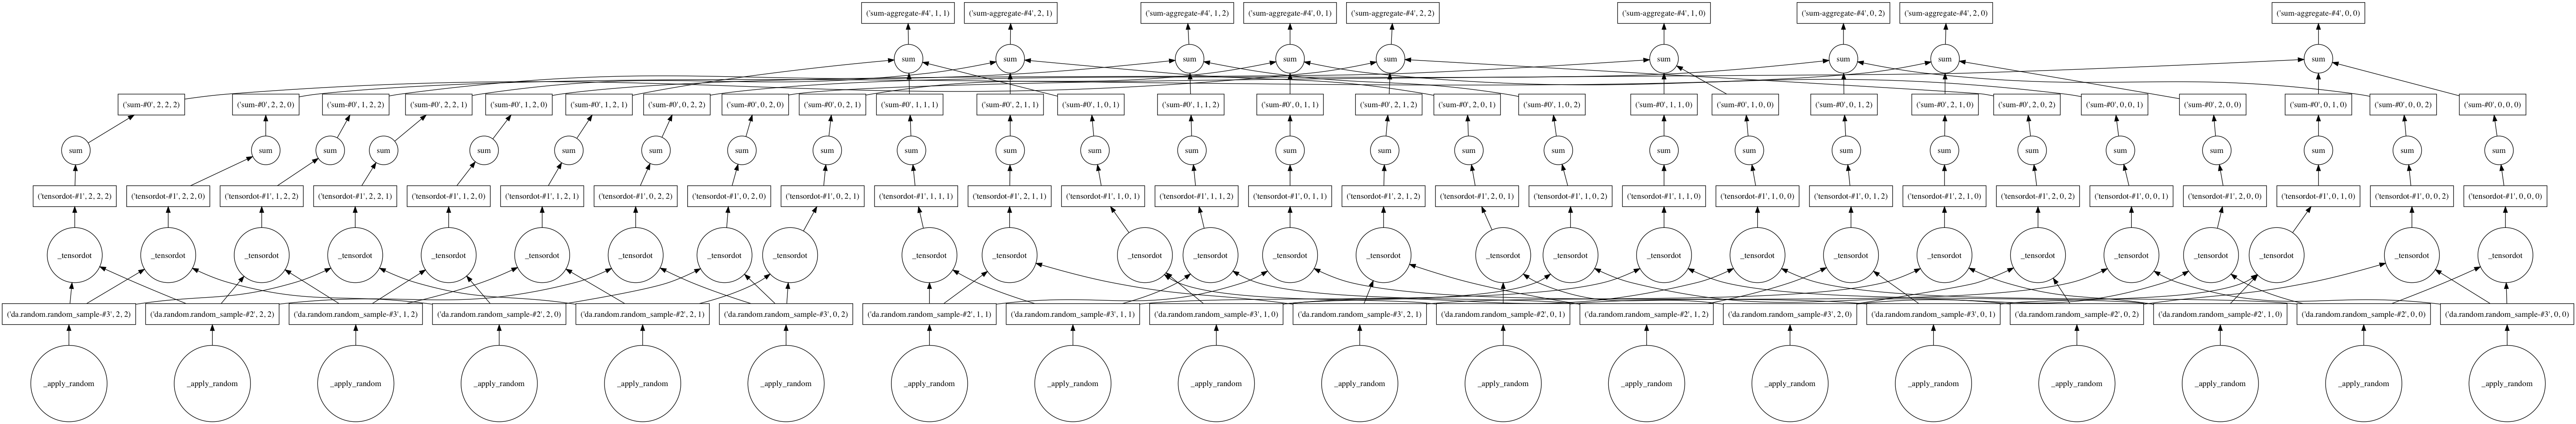

In [12]:
r.visualize()

In [13]:
r.compute()

array([[0.68556591, 0.82451388, 1.51799078],
       [0.53823635, 0.71430383, 1.42777466],
       [0.60210841, 0.71510894, 1.29590216]])

### Linear Regression OLS with Dask

In [14]:
X = da.random.random((10000, 20), chunks=(1000, 20))

In [15]:
X.shape

(10000, 20)

In [16]:
y = da.random.random(10000, chunks=(10000))

In [17]:
y.shape

(10000,)

In [18]:
w = da.dot(da.dot(da.linalg.inv(da.dot(X.T, X)), X.T), y)

In [19]:
w

dask.array<sum-aggregate, shape=(20,), dtype=float64, chunksize=(20,)>

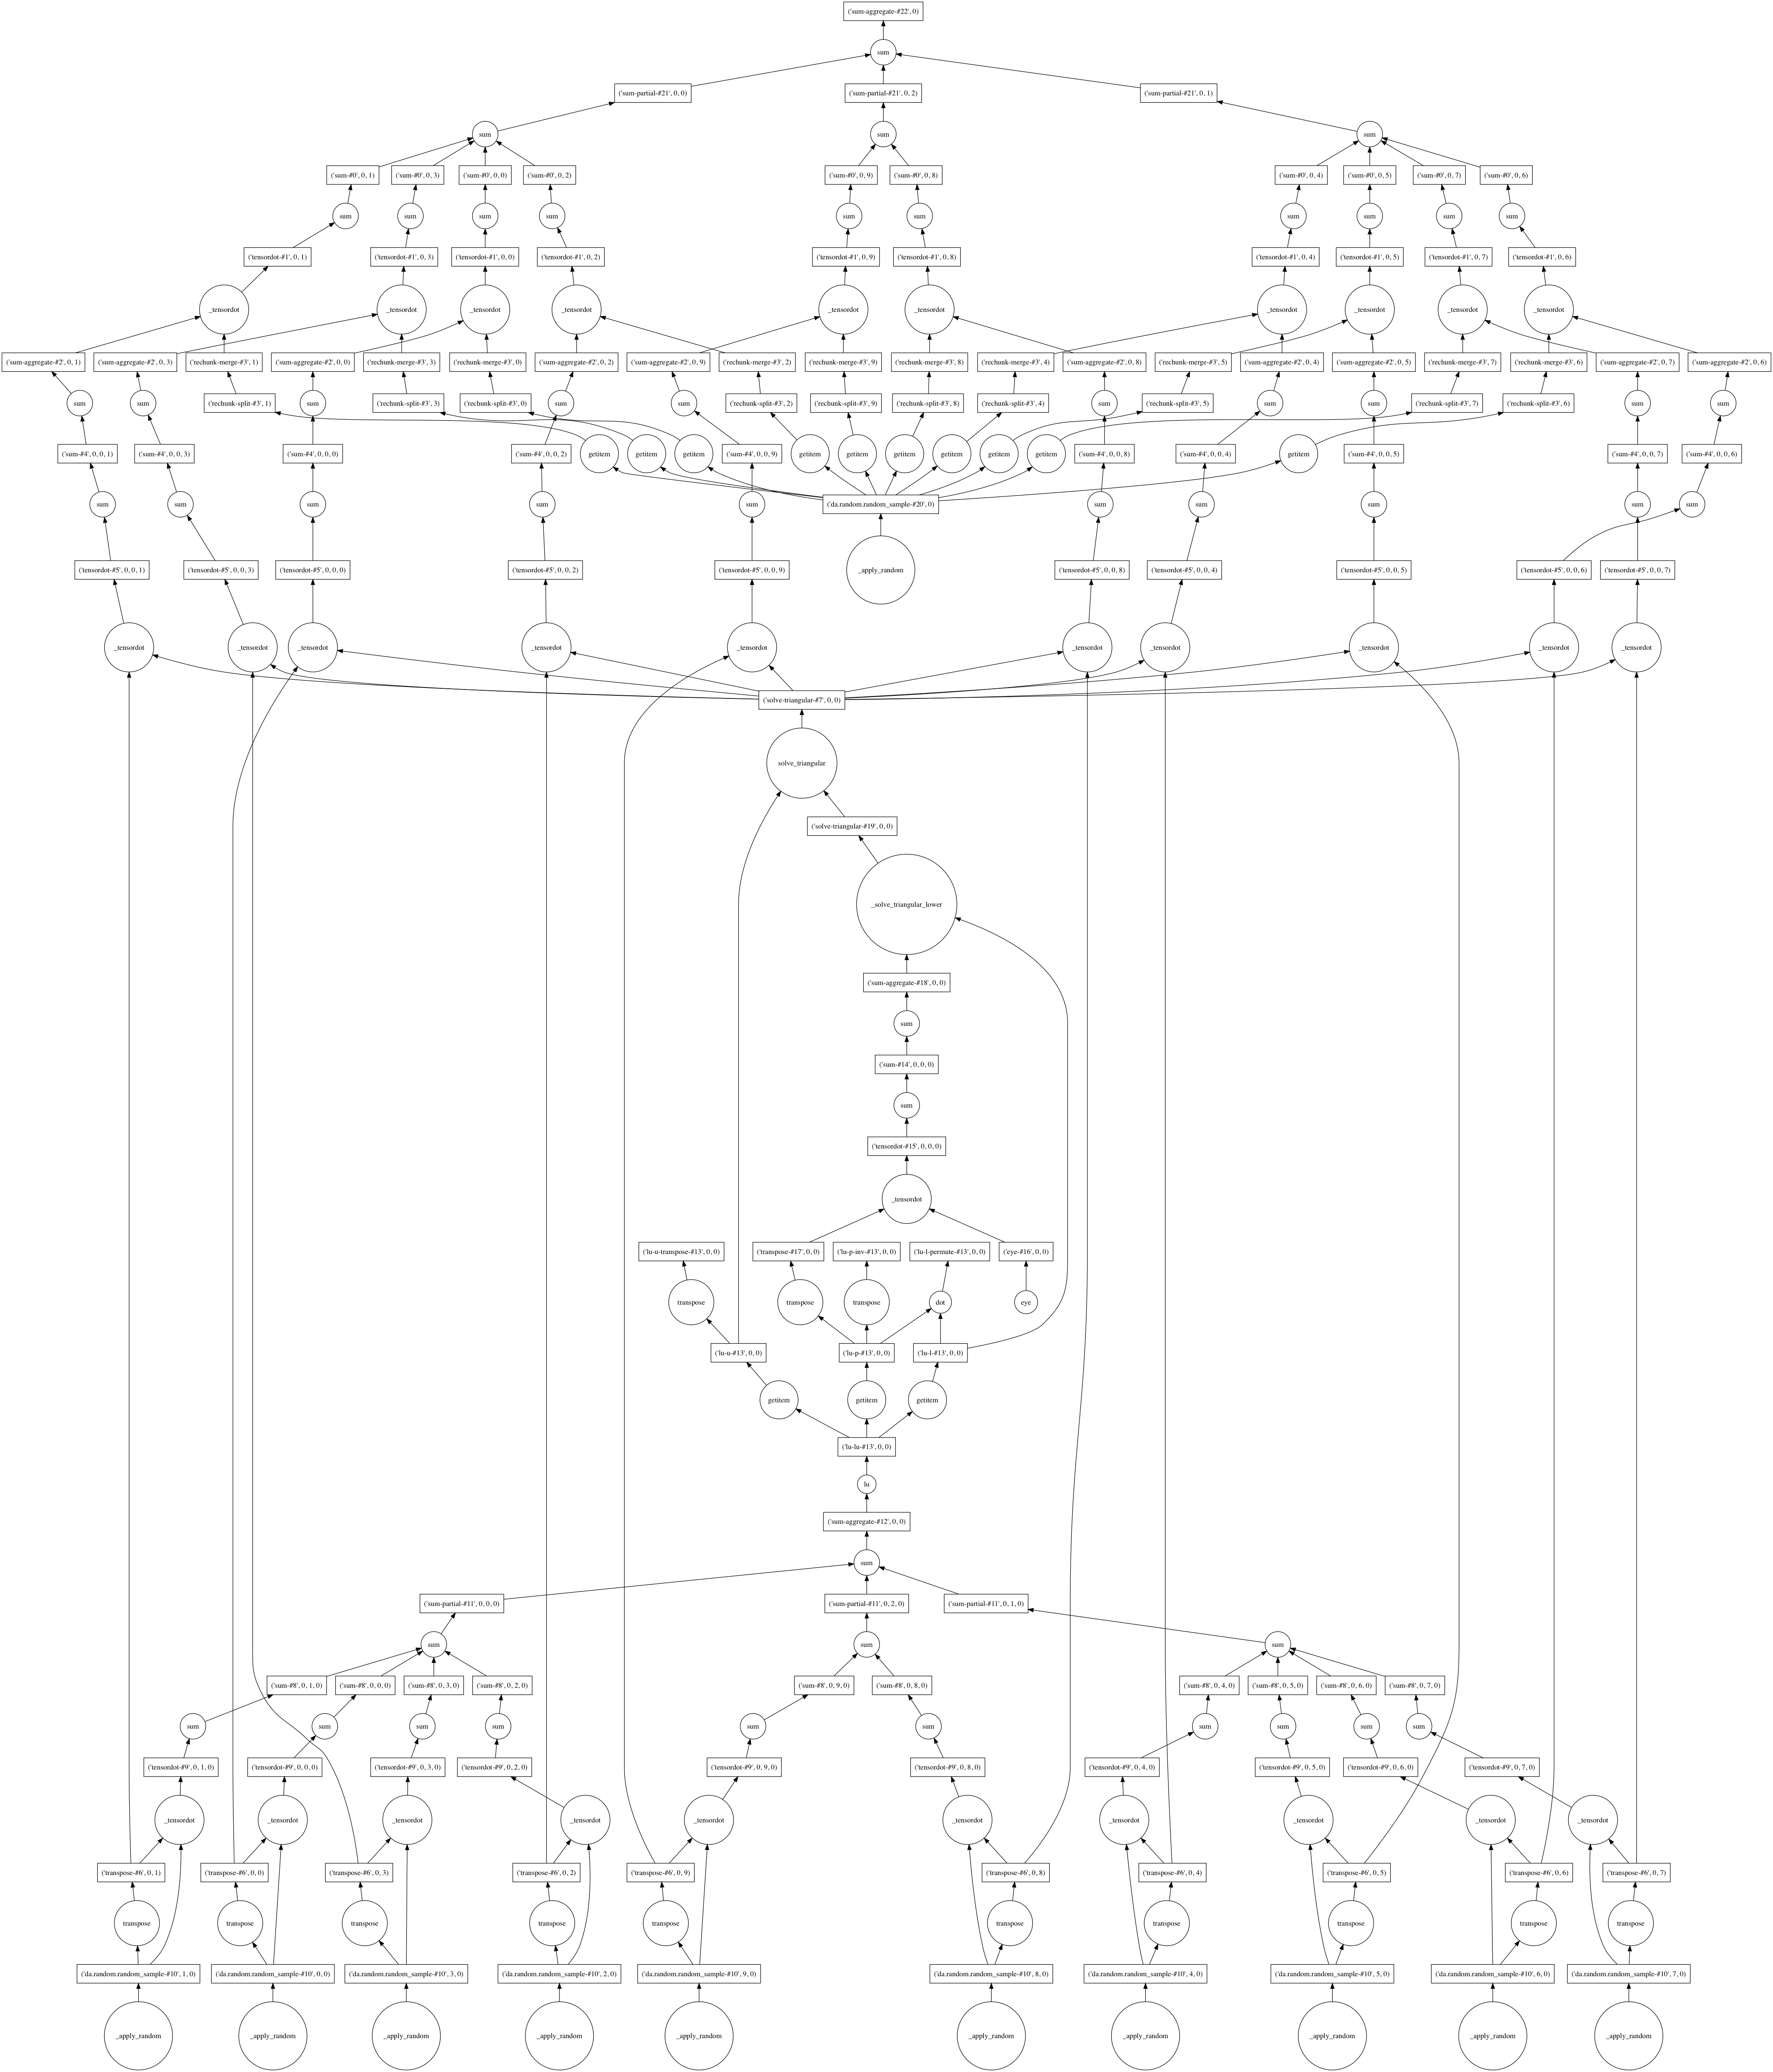

In [20]:
w.visualize()

In [21]:
w = w.compute()

In [22]:
w.shape

(20,)

In [23]:
w

array([0.04007472, 0.04203608, 0.04414222, 0.05771191, 0.05099242,
       0.04145796, 0.05553385, 0.05119314, 0.03735234, 0.06132346,
       0.05006147, 0.04743774, 0.05174479, 0.04931856, 0.0369146 ,
       0.05830434, 0.06057881, 0.04207798, 0.04285214, 0.05742597])

### Dask Array partiotions

In [24]:
X = da.random.random((4, 4), chunks=(2,2))

In [25]:
X

dask.array<da.random.random_sample, shape=(4, 4), dtype=float64, chunksize=(2, 2)>

In [26]:
X.npartitions

4